In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

In [2]:
#data preparation
wine = datasets.load_wine()
X = wine.data[:, :2]

In [3]:
#intializing guassian mixture models
n_components = 2  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

In [4]:
#fitting GMM model
gmm_models = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models.items():
    gmm_model.fit(X)


In [5]:
#accessing covarinces
covariances = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models.items()}

In [6]:
#GMM models for clustering or predictions
predictions = {cov_type: gmm_model.predict(X)
               for cov_type, gmm_model in gmm_models.items()}

Covariance Matrix (full - Component):
[[0.56109026 0.35297462]
 [0.35297462 1.19112946]]
Covariance Matrix (tied - Component):
[0.65472811 0.06104194]
Covariance Matrix (diag - Component):
[0.77470501 0.13064663]
Covariance Matrix (spherical - Component):
0.5272300465214598


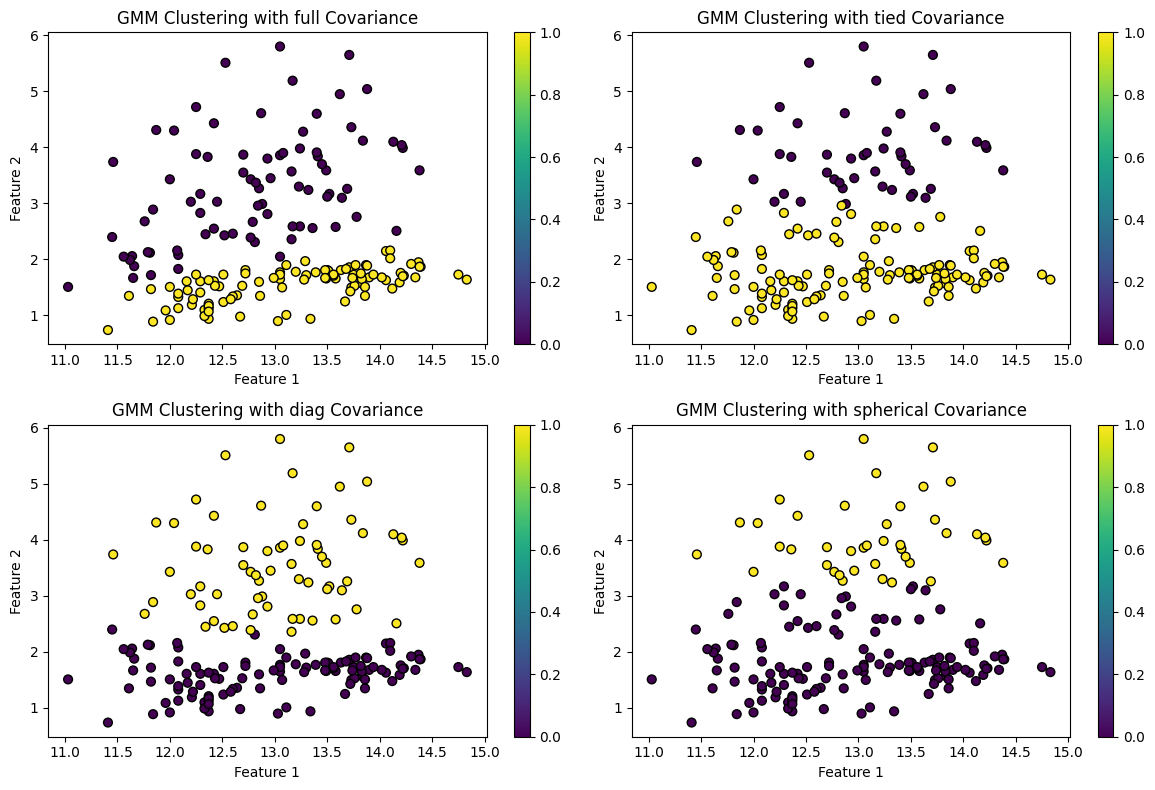

In [7]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=predictions[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()

    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances[cov_type][0]}')

plt.tight_layout()
plt.show()

The plot shows how different covariance types affect the clustering results in Gaussian Mixture Models (GMM).

Full covariance offers flexibility
Tied uses same shapes
Diagonal assumes no feature correlation
Spherical treats all clusters as equal in size and shape.
The choice depends on the dataset's structure and the balanc

Implementation of Expectation-Maximization Algorithm




In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

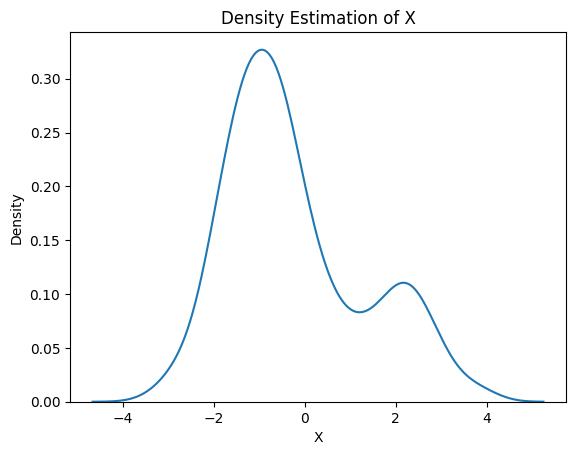

In [9]:
#2 sets of data with gaussian
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8

X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)
X = np.concatenate([X1, X2])

sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()

In [10]:
#parameters intializing
mu1_hat, sigma1_hat = np.mean(X1), np.std(X1)
mu2_hat, sigma2_hat = np.mean(X2), np.std(X2)
pi1_hat, pi2_hat = len(X1) / len(X), len(X2) / len(X)

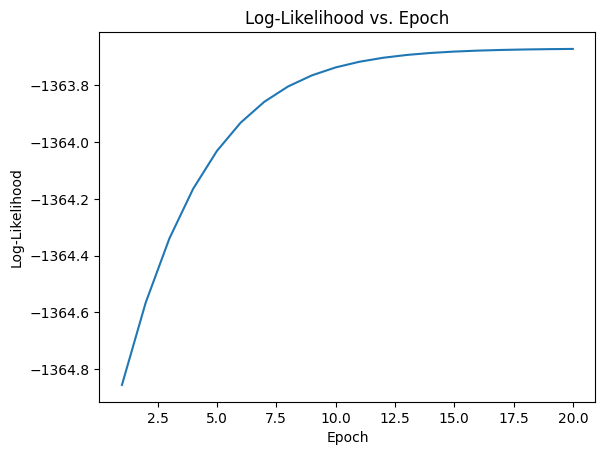

In [11]:
#perform EM algorithm
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
    gamma1 = pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
    gamma2 = pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)
    total = gamma1 + gamma2
    gamma1 /= total
    gamma2 /= total

    mu1_hat = np.sum(gamma1 * X) / np.sum(gamma1)
    mu2_hat = np.sum(gamma2 * X) / np.sum(gamma2)
    sigma1_hat = np.sqrt(np.sum(gamma1 * (X - mu1_hat)**2) / np.sum(gamma1))
    sigma2_hat = np.sqrt(np.sum(gamma2 * (X - mu2_hat)**2) / np.sum(gamma2))
    pi1_hat = np.mean(gamma1)
    pi2_hat = np.mean(gamma2)

    log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
                                   + pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)))
    log_likelihoods.append(log_likelihood)


plt.plot(range(1, num_epochs + 1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()

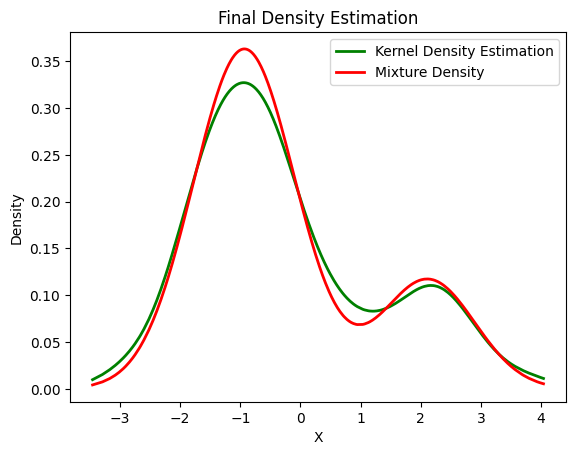

In [12]:
#result
X_sorted = np.sort(X)
density_estimation = (pi1_hat * norm.pdf(X_sorted, mu1_hat, sigma1_hat) +
                      pi2_hat * norm.pdf(X_sorted, mu2_hat, sigma2_hat))

plt.plot(X_sorted, gaussian_kde(X_sorted)(
    X_sorted), color='green', linewidth=2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Final Density Estimation')
plt.legend(['Kernel Density Estimation', 'Mixture Density'])
plt.show()

Implementing Dirichlet Process Mixture Models using Sklearn

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA


data = pd.read_csv('/content/Mall_Customers- (1).csv')
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [14]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values#feature selection

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)#dimensionality reduction

In [16]:
#fit guassian model
dpmm = BayesianGaussianMixture(
    n_components=10,
    covariance_type='full',
    weight_concentration_prior_type='dirichlet_process',
    weight_concentration_prior=1e-2,
    random_state=42
)

dpmm.fit(X)
labels = dpmm.predict(X)

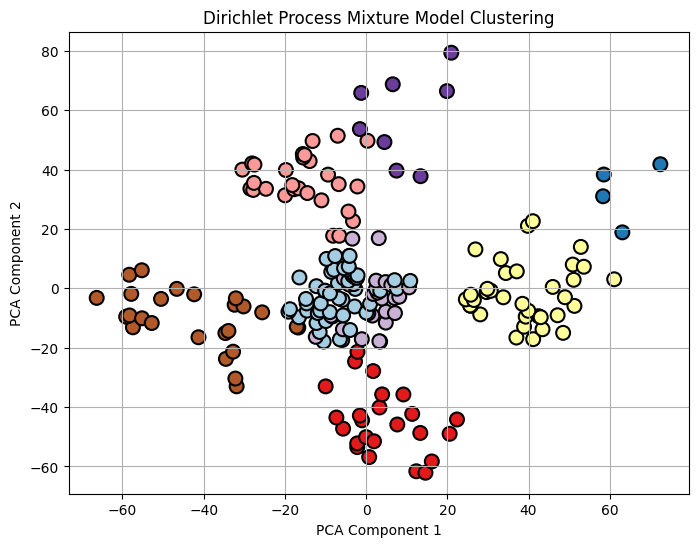

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=plt.cm.Paired, edgecolors='k', s=100, linewidth=1.5)
plt.title('Dirichlet Process Mixture Model Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()